## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
data['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [5]:
#Converting the labels to numerical values
label_mapping={'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

In [6]:
# Count the occurrences of each emotion
emotion_counts = data['label'].value_counts()

# Define emotional labels
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Map numerical labels to emotional labels
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]


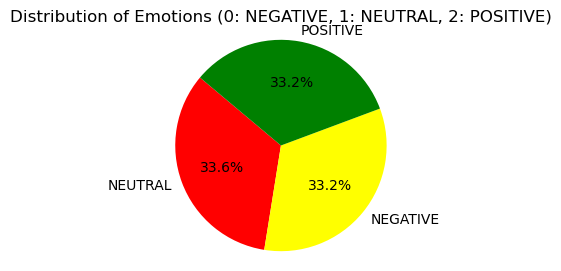

In [7]:
# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')  
plt.show()

In [8]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']


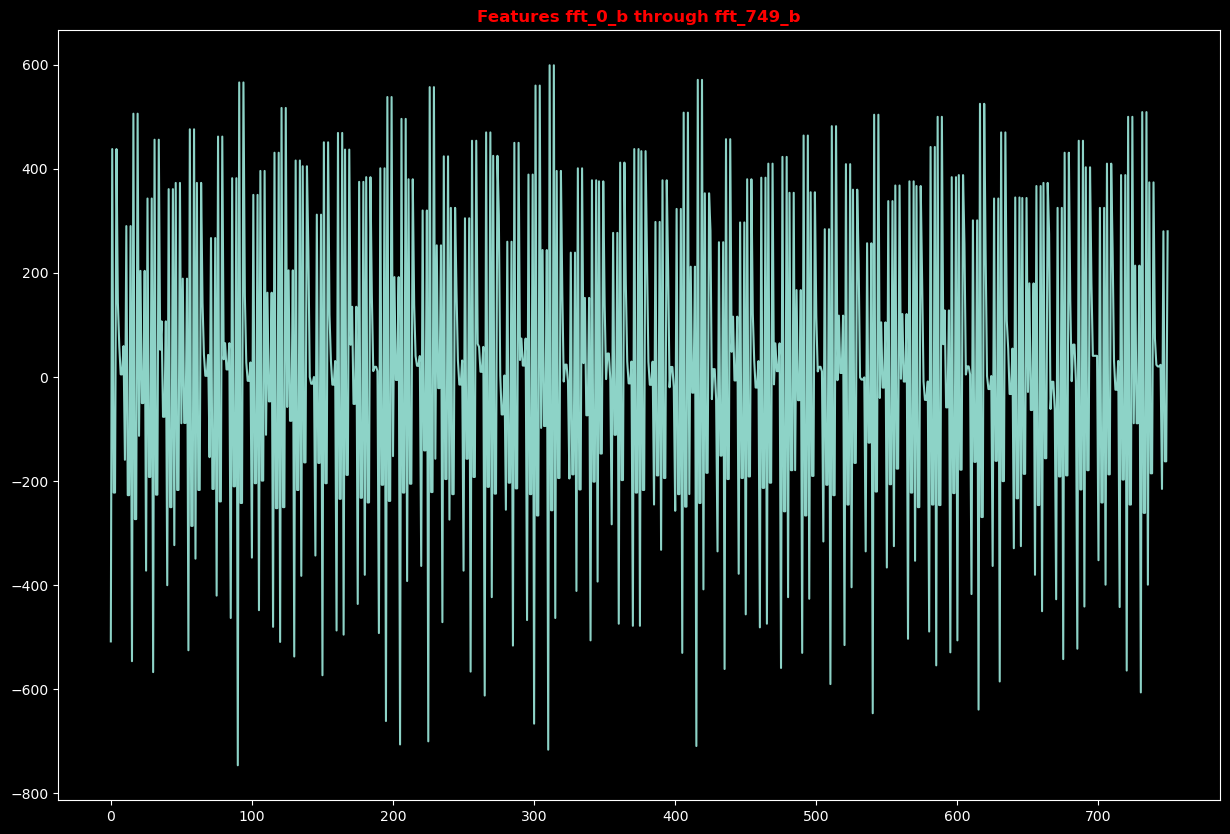

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
plt.plot(range(len(sample)),sample)
plt.title("Features fft_0_b through fft_749_b",weight='bold',color='red')
plt.show()

# Preprocessing the data

In [10]:
# Separate features (EEG signals) and labels (emotions)
X = data.iloc[:, :-1]  # All columns except the last (emotion labels)
y = data.iloc[:, -1]   # The last column (emotion labels)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
480,-2.450,24.6,2.16,-10.400,18.9,-2.650,-0.101,7.930,1.2500,6.290,...,111.0,54.60,20.60,20.60,54.60,70.4,-21.50,-56.20,-56.20,-21.50
1394,6.340,16.9,22.40,0.164,23.1,-1.590,-0.530,-0.792,0.3130,0.414,...,74.7,-8.65,9.79,9.79,-8.65,96.2,-1.54,-22.70,-22.70,-1.54
1204,12.900,30.5,-269.00,13.100,23.8,1.120,-1.890,27.900,2.6300,-2.040,...,-683.0,545.00,-229.00,-229.00,545.00,-136.0,172.00,-34.90,-34.90,172.00
1654,-12.400,26.6,-870.00,8.590,24.8,7.880,-1.530,-2.680,-0.4580,-3.810,...,-760.0,781.00,-309.00,-309.00,781.00,-701.0,702.00,-184.00,-184.00,702.00
1010,15.400,26.6,-137.00,14.900,29.4,-0.609,0.198,17.700,0.3730,2.000,...,281.0,-77.50,56.20,56.20,-77.50,-245.0,321.00,-152.00,-152.00,321.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,13.900,17.5,-327.00,3.810,27.1,-6.400,-5.460,8.670,-0.0145,3.070,...,-598.0,523.00,-190.00,-190.00,523.00,239.0,-3.29,3.25,3.25,-3.29
1095,31.300,31.0,30.70,28.900,27.5,2.800,0.253,-3.680,-1.1800,12.300,...,148.0,1.69,14.40,14.40,1.69,119.0,-5.84,3.71,3.71,-5.84
1130,0.959,24.5,7.31,-12.600,21.2,-4.170,0.307,-18.300,3.1700,-10.700,...,83.4,29.80,-9.69,-9.69,29.80,23.6,-35.40,-35.80,-35.80,-35.40
1294,26.700,29.3,22.70,26.000,25.9,8.500,1.680,-2.560,1.6700,-0.216,...,150.0,-2.57,-11.80,-11.80,-2.57,148.0,-12.50,14.30,14.30,-12.50


In [13]:
y_train

480     2
1394    2
1204    2
1654    0
1010    0
       ..
1638    0
1095    1
1130    2
1294    1
860     0
Name: label, Length: 1705, dtype: int64

# Modelling the data

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Choose a machine learning model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)

In [16]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      1.00      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Accuracy: 0.99
